In [1]:
#Importing the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [2]:
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df
print(boston_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB
None


In [3]:
boston_df['Price']=boston.target
print(boston_df.head(3))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  


In [4]:
"""Predictors """
newX=boston_df.drop('Price',axis=1)
print(newX[0:3])
newY=boston_df['Price']
newY

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [5]:
X_train, X_test, y_train, y_test=train_test_split(newX,newY,test_size=0.3,random_state=1)
print(len(X_test),len(y_test))

152 152


In [6]:
lr=LinearRegression()
lr.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
rr=Ridge(alpha=0.01)
rr.fit(X_train,y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [8]:
rr100=Ridge(alpha=100)
rr100.fit(X_train,y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [9]:
train_score=lr.score(X_train,y_train)
test_score=lr.score(X_test,y_test)

In [10]:
Ridge_train_score=rr.score(X_train,y_train)
Ridge_test_score=rr.score(X_test,y_test)


In [11]:
Ridge_train_score100=rr100.score(X_train,y_train)
Ridge_test_score100=rr100.score(X_test,y_test)

In [12]:
print("linear regression train score : ", train_score)
print("linear regression test score : ", test_score)
print("Ridge regression train score low alpha: ", Ridge_train_score)
print("Ridge regression test score low alpha: ", Ridge_test_score)
print("Ridge regression train score high alpha: ", Ridge_train_score100)
print("Ridge regression test score high alpha: ", Ridge_test_score100)

linear regression train score :  0.7103879080674731
linear regression test score :  0.7836295385076268
Ridge regression train score low alpha:  0.7103864838468883
Ridge regression test score low alpha:  0.7837991009786622
Ridge regression train score high alpha:  0.6817424284288655
Ridge regression test score high alpha:  0.7478638002897837


In [13]:
rr.coef_

array([-9.83772362e-02,  6.08062514e-02,  5.82829962e-02,  2.43634211e+00,
       -2.12779852e+01,  2.79796542e+00,  3.41381421e-03, -1.51351779e+00,
        3.07077342e-01, -1.12983104e-02, -1.00316391e+00,  6.46246924e-03,
       -5.69026234e-01])

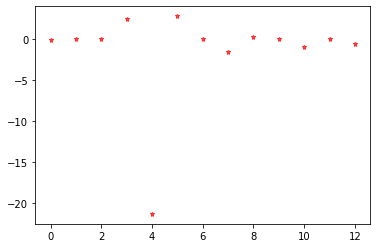

In [14]:
plt.plot(rr.coef_, alpha=0.7, linestyle='none', marker='*', markersize=5, color='red', label=r'Ridge; $\alpha=0.01$', zorder=7)

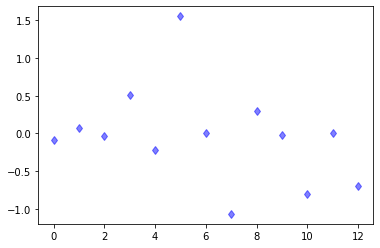

In [15]:
plt.plot(rr100.coef_, alpha=0.5, linestyle='none', marker='d', markersize=6, color='blue', label=r'Ridge; $\alpha=100$')

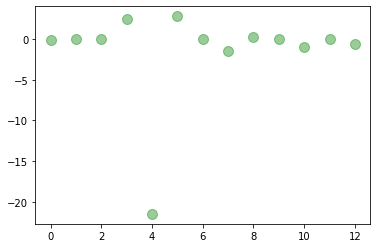

In [16]:
plt.plot(lr.coef_, alpha=0.4, linestyle='none', marker='o', markersize=10, color='green', label='Linear Regression')